In [149]:
import json 
import numpy as np
import pandas as pd
from dataprocessing_functions import features, machine, kpi, fields
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
with open('C:\\Users\\mcapo\\Desktop\\Smart app project\\definitive\\definitivo_3\\transformation_interrupted.json', "r") as json_file:
        in_data = json.load(json_file)
cleaned=pd.DataFrame(in_data[1])
cleaned['var']=np.nan
cleaned=cleaned[fields + ['status']]

In [153]:
import warnings
warnings.filterwarnings("ignore")
for m in list(machine.keys()):
    for a in machine[m]:
        for k in list(kpi.keys()):
            for o in kpi[k][1]:
                section=cleaned[(cleaned['name']==m)&(cleaned['asset_id']==a)&(cleaned['kpi']==k)&(cleaned['operation']==o)]
                nan_columns = section.columns[section.isna().all()]
                length=30
                for i in range(0, section.shape[0], length):
                    train_set=section[features].iloc[i:i+length]
                    train_set = train_set.drop(columns=nan_columns)
                    train_set=train_set.fillna(0)
                    s=[]
                    cc=np.arange(0.01, 0.5, 0.01)
                    for c in cc:
                        model = IsolationForest(n_estimators=200, contamination=c)
                        an_pred=model.fit_predict(train_set)
                        if len(set(an_pred)) > 1:  # Check for multiple clusters
                            s.append(silhouette_score(train_set, an_pred))
                        else:
                            s.append(-1)  # Append a placeholder or ignore this case
                    if max(s)<=0.70:
                        optimal_c=1e-5
                    else:
                        optimal_c=cc[np.argmax(s)]
                    model = IsolationForest(n_estimators=200, contamination=optimal_c)
                    section['status'].iloc[i:i+length] = model.fit_predict(train_set)
                    section['status'].iloc[i:i+length] = section['status'].iloc[i:i+length].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
                cleaned.loc[section.index] = section  
    store=[cleaned.to_dict(),[m, a]]
    with open('C:\\Users\\mcapo\\Desktop\\Smart app project\\definitive\\definitivo_3\\anomaly.json', "w") as json_file:
        json.dump(store, json_file, indent=1)


In [151]:
k

'cost'

In [152]:
kpi

{'time': [[0, 86400], ['working', 'idle', 'offline']],
 'consumption': [[0, 500000], ['working', 'idle', 'offline']],
 'power': [[0, 200000], ['independent']],
 'emission_factor': [[0, 3], ['independent']],
 'cycles': [[0, 300000], ['working']],
 'average_cycle_time': [[0, 4000], ['working']],
 'good_cycles': [[0, 300000], ['working']],
 'bad_cycles': [[0, 300000], ['working']],
 'cost': [[0, 1], ['independent']]}

In [ ]:
optimal_c

0.0001

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --],
             mask=[ True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1000x600 with 1 Axes>

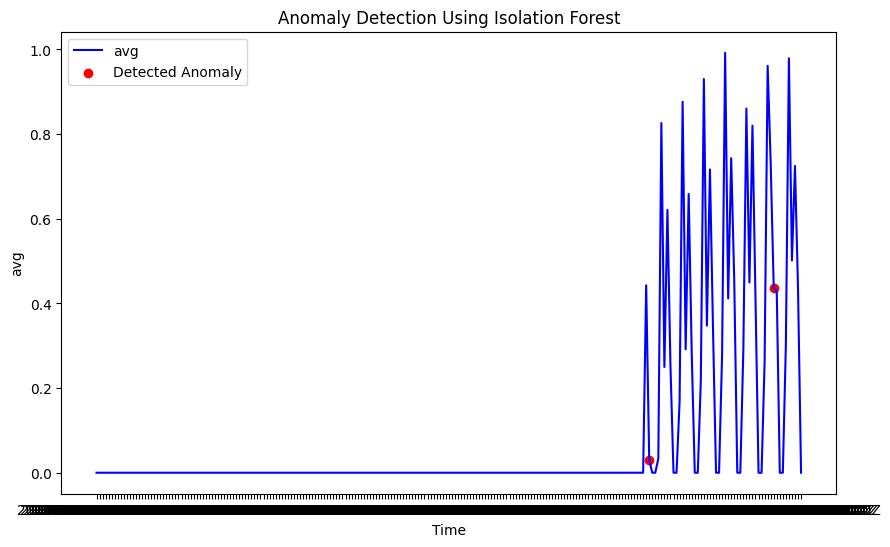

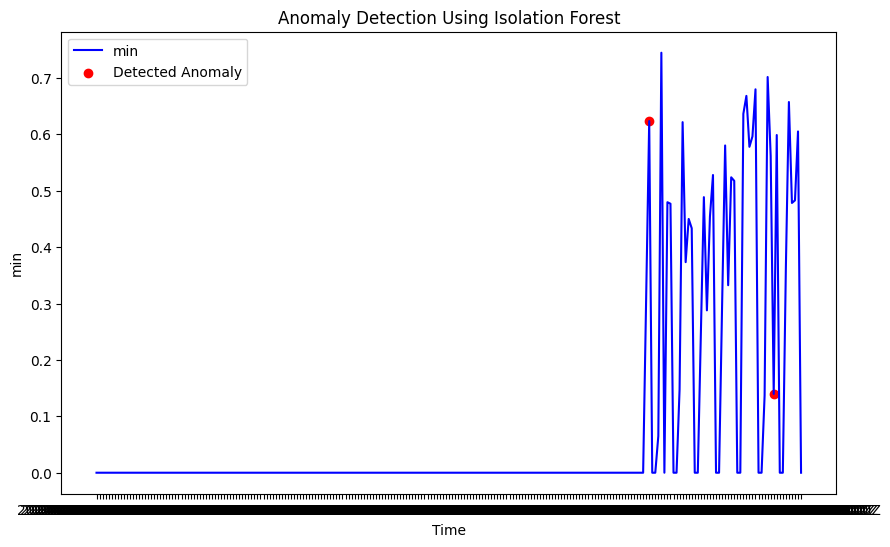

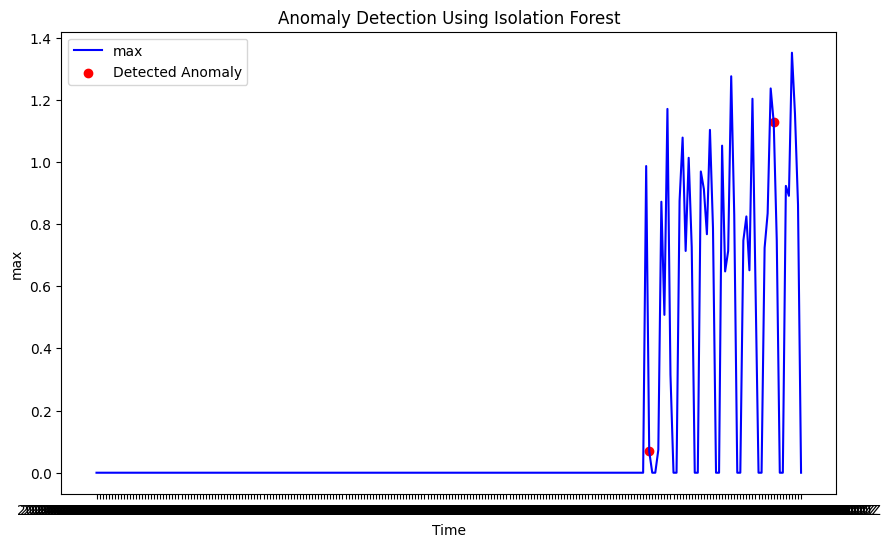

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --],
             mask=[ True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1000x600 with 1 Axes>

In [ ]:
import matplotlib.pyplot as plt
for ff in features:
    # Plot the features along with anomaly markers
    plt.figure(figsize=(10, 6))
    plt.plot(section['time'], section[ff], label=ff, color='blue')
    plt.scatter(section['time'][section['status'] == 'Anomaly'], section[ff][section['status'] == 'Anomaly'], color='red', label='Detected Anomaly')

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel(ff)
    plt.title('Anomaly Detection Using Isolation Forest')
    plt.legend()
    plt.show()